In [ ]:
# import pandas as pd
# import numpy as np
# import re
# import nltk
# import seaborn as sns
# import matplotlib.pyplot as plt
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from sklearn.metrics import classification_report
# from wordcloud import WordCloud
# from plotly.subplots import make_subplots
# import plotly.graph_objs as go
# from plotly.offline import init_notebook_mode, iplot
# from textblob import TextBlob

# # Initialize NLTK resources
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('vader_lexicon')

# # Initialize Plotly for offline mode
# init_notebook_mode(connected=True)

# # Load the dataset
# df = pd.read_csv('amazon_reviews.csv')

# # Preview the dataset
# print("Dataset Loaded:")
# print(df.head())

# # Drop unnecessary columns if needed
# df.drop(['Unnamed: 0'], axis=1, inplace=True)

# # Check for missing values
# def check_missing(data):
#     missing = data.isnull().sum()
#     print("Missing Values:")
#     print(missing)

# check_missing(df)

# # Drop rows with missing reviewText
# df = df.dropna(subset=['reviewText'])

# # Preprocessing: Clean the reviewText column
# lemmatizer = WordNetLemmatizer()
# def clean_text(text):
#     text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
#     text = text.lower().split()  # Lowercase and tokenize
#     text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords.words('english')]
#     return ' '.join(text)

# df['reviewText'] = df['reviewText'].map(clean_text)

# # Correct spelling errors
# df['reviewText'] = df['reviewText'].apply(lambda x: str(TextBlob(x).correct()))

# # Visualize overall ratings distribution
# def plot_rating_distribution(data):
#     plt.figure(figsize=(10, 6))
#     sns.countplot(x='overall', data=data, palette='viridis')
#     plt.title('Ratings Distribution')
#     plt.xlabel('Ratings')
#     plt.ylabel('Count')
#     plt.show()

# plot_rating_distribution(df)

# # Generate Word Cloud
# def plot_wordcloud(data):
#     text = ' '.join(data)
#     wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
#     plt.figure(figsize=(10, 6))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis('off')
#     plt.title('Word Cloud of Reviews')
#     plt.show()

# plot_wordcloud(df['reviewText'])

# # Sentiment Analysis with VADER
# analyzer = SentimentIntensityAnalyzer()

# def analyze_sentiment(text):
#     scores = analyzer.polarity_scores(text)
#     if scores['compound'] > 0.05:
#         return 'Positive'
#     elif scores['compound'] < -0.05:
#         return 'Negative'
#     else:
#         return 'Neutral'

# df['sentiment'] = df['reviewText'].apply(analyze_sentiment)

# # Evaluation Metrics
# # Assuming 'true_sentiment' is a column with the ground truth labels
# if 'true_sentiment' in df.columns:
#     print(classification_report(df['true_sentiment'], df['sentiment']))

# # Visualize sentiment distribution
# def plot_sentiment_distribution(data):
#     sns.countplot(x='sentiment', data=data, palette='coolwarm')
#     plt.title('Sentiment Distribution')
#     plt.xlabel('Sentiment')
#     plt.ylabel('Count')
#     plt.show()

# plot_sentiment_distribution(df)

# # Analyze helpfulness
# def plot_helpfulness(data):
#     fig = make_subplots(rows=1, cols=2, subplot_titles=('Helpfulness Votes', 'Percentage of Helpfulness'))

#     # Bar chart
#     fig.add_trace(go.Bar(
#         x=data['helpful_yes'],
#         y=data['helpful_no'],
#         text=data['helpful_yes'] + data['helpful_no'],
#         textposition='auto',
#         marker=dict(color='rgba(100,200,150,0.6)')
#     ), row=1, col=1)

#     # Pie chart
#     fig.add_trace(go.Pie(
#         labels=['Helpful Yes', 'Helpful No'],
#         values=[data['helpful_yes'].sum(), data['helpful_no'].sum()],
#     ), row=1, col=2)

#     fig.update_layout(title_text='Helpfulness Analysis', template='plotly_white')
#     iplot(fig)

# plot_helpfulness(df)


In [1]:
import pandas as pd
import numpy as np
import re
import nltk

In [2]:
df = pd.read_csv('amazon.csv')

In [3]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.isnull().sum()

,0
reviewerName,1
overall,0
reviewText,1
reviewTime,0
day_diff,0
helpful_yes,0
helpful_no,0
total_vote,0
score_pos_neg_diff,0
score_average_rating,0


In [8]:
df.dropna(subset=['reviewerName'],inplace=True)

In [9]:
df.isnull().sum()

,0
reviewerName,0
overall,0
reviewText,1
reviewTime,0
day_diff,0
helpful_yes,0
helpful_no,0
total_vote,0
score_pos_neg_diff,0
score_average_rating,0


In [10]:
df.dropna(subset=['reviewText'],inplace=True)

In [11]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [12]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
nltk.download('stopwords')
from nltk.corpus import stopwords
def clean_text(text):
  text = re.sub(r'[^a-zA-Z\s]','',text)
  text = text.lower().split()
  text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords.words('english')]
  return ' '.join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df['reviewText'] = df['reviewText'].map(clean_text)

In [17]:
from textblob import TextBlob
df['reviewText']=df['reviewText'].apply(lambda x: str(TextBlob(x).correct()))

KeyboardInterrupt: 

<ipython-input-24-bff5b832bd96>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='overall', data=data, palette='viridis')


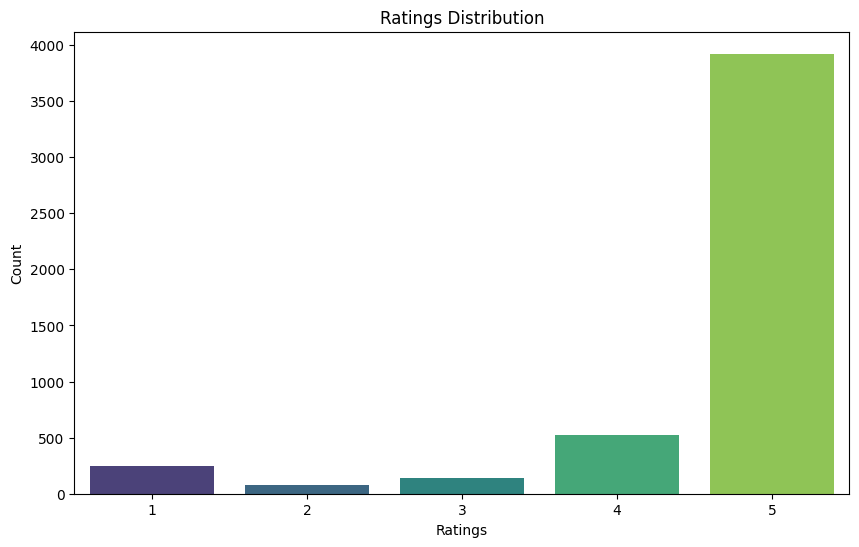

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_rating_distribution(data):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='overall', data=data, palette='viridis')
    plt.title('Ratings Distribution')
    plt.xlabel('Ratings')
    plt.ylabel('Count')
    plt.show()

plot_rating_distribution(df)

In [25]:
# Generate Word Cloud
from wordcloud import WordCloud
def plot_wordcloud(data):
    text = ' '.join(data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Reviews')
    plt.show()

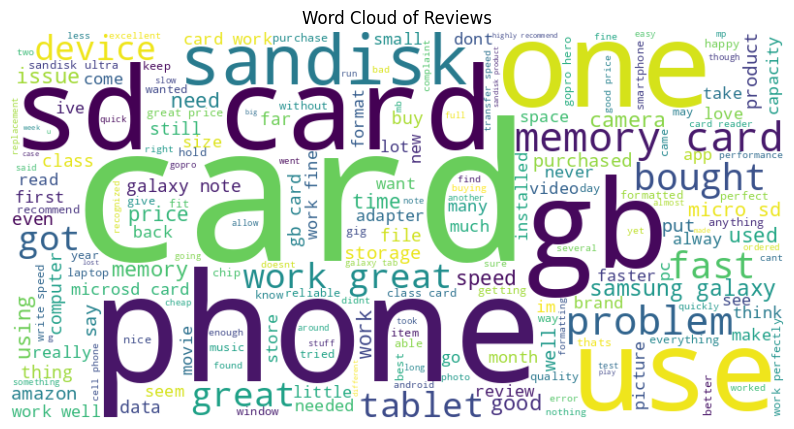

In [26]:
plot_wordcloud(df['reviewText'])

In [28]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [29]:
def analyze_sentiment(text):
  score = analyzer.polarity_scores(text)
  if score['compound'] > 0.5:
    return 'Positive'
  elif score['compound'] < -0.5:
    return 'Negative'
  else:
    return 'Neutral'

In [31]:
df['reviewText'] = df['reviewText'].apply(analyze_sentiment)

In [32]:
from sklearn.metrics import classification_report

In [33]:
# def plot_sentiment_distribution(data):
#     sns.countplot(x='sentiment', data=data, palette='coolwarm')
#     plt.title('Sentiment Distribution')
#     plt.xlabel('Sentiment')
#     plt.ylabel('Count')
#     plt.show()

# plot_sentiment_distribution(df)

ValueError: Could not interpret value `sentiment` for `x`. An entry with this name does not appear in `data`.

In [34]:
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,0mie,5,Neutral,25-10-2013,409,0,0,0,0,0.0,0.0
2,1K3,4,Neutral,23-12-2012,715,0,0,0,0,0.0,0.0
3,1m2,5,Positive,21-11-2013,382,0,0,0,0,0.0,0.0
4,2&amp;1/2Men,5,Positive,13-07-2013,513,0,0,0,0,0.0,0.0
5,2Cents!,5,Neutral,29-04-2013,588,0,0,0,0,0.0,0.0


In [39]:
for ind,row in df.iterrows():
  if 1<=row['overall']<=2:
    df.loc[ind, 'overall'] = 'Negative'
  elif row['overall']==3:
    df.loc[ind, 'overall'] = 'Neutral'
  else:
    df.loc[ind, 'overall'] = 'Positive'

<ipython-input-39-c4ef2472f4e3>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Positive' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[ind, 'overall'] = 'Positive'


In [40]:
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,0mie,Positive,Neutral,25-10-2013,409,0,0,0,0,0.0,0.0
2,1K3,Positive,Neutral,23-12-2012,715,0,0,0,0,0.0,0.0
3,1m2,Positive,Positive,21-11-2013,382,0,0,0,0,0.0,0.0
4,2&amp;1/2Men,Positive,Positive,13-07-2013,513,0,0,0,0,0.0,0.0
5,2Cents!,Positive,Neutral,29-04-2013,588,0,0,0,0,0.0,0.0


In [41]:
print(classification_report(df['overall'],df['reviewText']))

              precision    recall  f1-score   support

    Negative       0.43      0.31      0.36       324
     Neutral       0.04      0.48      0.07       142
    Positive       0.96      0.62      0.75      4447

    accuracy                           0.60      4913
   macro avg       0.47      0.47      0.39      4913
weighted avg       0.89      0.60      0.71      4913

